# Milestone 1 - Model Exploration

In [1]:
%load_ext autoreload
%autoreload 2
%cd ../

/Users/godlinn/Documents/Studium/WS2022/NLP/project-team14


In [2]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/godlinn/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/godlinn/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/godlinn/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
from tuwnlpie.milestone1.utils import split_train_dev_test,prepare_dataset,lemmatize_dataset,transform_to_dictionary,train_NaiveBayes,show_features,evaluate_nltk_nb,test_prediction_for_new_sentence,split_train_test_sklearn,train_multi_nb_classifier,train_svm_classifier,undersampling_dataset
from scripts.evaluate import eval_model

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
fulldata=prepare_dataset("./data/food_disease_dataset.csv")
fulldata

,sentence,target
0,"Interestingly, many Indian tribes use Bombax c...",treat
1,Ultra-processed food consumption has been asso...,cause
2,Salt has notoriously been blamed for causing a...,cause
3,in broiler chicken flocks when animal-based me...,neutral
4,"In short, this study demonstrated that SFP cou...",treat
...,...,...
603,"Thus, the inclusion of food sources of dietary...",treat
604,Glasshouse pathogenicity tests with 'Reed' avo...,neutral
605,Intake of beverages with excess free fructose ...,cause
606,"However, some evidence exists regarding a pote...",treat


**Notes on dataset**:
- We had some problems with encodings for symbols from greek alphabet (alpha,beta,omega) so we replaced these symbols directly in the excel csv file.
- Is_treat and is_cause boolean variables were transformed into target label with 3 levels (treat, cause, neutral)
- no lemmatization or stop words removal was done for this version
- only sentence and label are used => no relation extraction yet

In [3]:
fulldata['target'].value_counts()

treat      323
neutral    144
cause      141
Name: target, dtype: int64

**We can see that the dataset is unbalanced because there are 2x as many treat occurences as there are cause occurences. There are also a large amount of sentences with no treat or cause relation ("neutral")**

**For Naive Bayes function from nltk package we need to transform the list of sentences and labels into a list of dictionaries** 

**(this transformation will take ~5 minutes)**

In [4]:
t=transform_to_dictionary(fulldata)

**Example how the data looks like before splitting into train and test datasets:** <br>
**for every word in the dataset it is shown if this word was in a sentence that was related to "Treat" (=true) or not (=false)** 

In [8]:
# print(t[0])

In [6]:
train_docs, dev_docs, test_docs = split_train_dev_test(t)

## Naive Bayes Classifier (from nltk package)

In [32]:
model = train_NaiveBayes(train_docs)

In [33]:
show_features(model)

Most Informative Features
             association = True           neutra : treat  =     14.1 : 1.0
               allergies = True            cause : treat  =     12.6 : 1.0
                 alcohol = True           neutra : treat  =     12.5 : 1.0
              infectious = True           neutra : treat  =     11.5 : 1.0
                   cause = True            cause : treat  =     11.1 : 1.0
                exposure = True            cause : treat  =      9.6 : 1.0
                 chicken = True           neutra : treat  =      9.5 : 1.0
               increased = True            cause : treat  =      9.3 : 1.0
           concentration = True           neutra : treat  =      9.1 : 1.0
                 against = True            treat : cause  =      8.9 : 1.0
                    than = True            cause : treat  =      8.1 : 1.0
                 between = True           neutra : treat  =      8.0 : 1.0
                   olive = True            treat : neutra =      7.9 : 1.0

**We can see that the word "allergies" is often connected to Causes and interestingly the word "against" is often connected to Treats**

In [34]:
evaluate_nltk_nb(model,test_docs)

Overall Accuracy: 0.7580645161290323
Cause precision: 0.75
Cause recall: 0.5454545454545454
Cause F-measure: 0.631578947368421
Treat precision: 0.7674418604651163
Treat recall: 0.9166666666666666
Treat F-measure: 0.8354430379746836
Neutral precision: 0.7272727272727273
Neutral recall: 0.5333333333333333
Neutral F-measure: 0.6153846153846154
        |     n    |
        |     e    |
        |  c  u  t |
        |  a  t  r |
        |  u  r  e |
        |  s  a  a |
        |  e  l  t |
--------+----------+
  cause | <6> .  5 |
neutral |  2 <8> 5 |
  treat |  .  3<33>|
--------+----------+
(row = reference; col = test)



### Discussion Naive Bayes Model (using NLTK package)

- Overall Accuracy for this baseline model is 0.75 which is ok but also not great. 
- One problem could be the "neutral" label and excluding "neutral" labels may benefit the performance of the model
- Treat label has higher metric scores than Cause label. The unbalanced data may be a factor here for the lower "Cause" metrics. Precision is similar over all 3 levels but there is noticable difference in performance when looking at F-measure and recall
- One weakness of this approach is that the the transform process for having the dataset in the right format for this method takes a lot of time (~5 min) and other approaches only take a few seconds so this dictionary appraoch will not be suitable for further models for the next milestones
- Strength of this approach is that building dictionarys leads to good results when taking into account that for this approach we did not use lemmatization or stopwords removal
- One issue for further analysis and for the next milestones could be the small sample size of this dataset. When testing random sentences for classification a lot of words are not even in the word list of the model and therefore these words do not have any weights for generating a prediction.

### Testing model with random food related sentences from short google search

In [35]:
test_prediction_for_new_sentence(fulldata,model,"Ultra-processed foods tend to be high in sugar, artificial ingredients, refined carbohydrates, and trans fats.")

'cause'

In [36]:
test_prediction_for_new_sentence(fulldata,model,"Sunflower seeds are full of nutrients, including phosphorous, magnesium, and vitamins B-6 and E.")

'treat'

In [37]:
test_prediction_for_new_sentence(fulldata,model,"Consuming too much added sugar can raise blood pressure and increase chronic inflammation, both of which are pathological pathways to heart disease.")

'cause'

**In all 3 cases the labeling makes sense. Ultra-processed foods and sugar should both be related to "Causes" and sunflower seeds are correctly classified here as "Treat"**

# Different Approach with Stop Words removal and Lemmatization

**We wanted to try a different approach where we remove the stop words from the sentences and also use a lemmatizer.
For this approach we also try different sklearn classifiers.**

**For this approach we remove stop words and use a lemmatizer within a function. After running this function we have a new processed data file with tokenized lemmatized sentences with removed stopwords**

In [202]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
df_entities = pd.read_csv('./data/food_disease_dataset.csv')
df_entities['sentence'] = df_entities['sentence'].str.lower()
df_entities.columns = ['id', 'food_entity', 'disease_entity', 'sentence',
       'disease_doid', 'is_cause', 'is_treat']

df_entities

,id,food_entity,disease_entity,sentence,disease_doid,is_cause,is_treat
0,0,bombax ceiba l. (bombacaceae) fruits,urinary stones,"interestingly, many indian tribes use bombax c...",NaN,0.0,1.0
1,1,ultra-processed food,obesity,ultra-processed food consumption has been asso...,DOID:9970,1.0,0.0
2,2,salt,osteoporosis,salt has notoriously been blamed for causing a...,DOID:11476,1.0,0.0
3,3,broiler chicken,footpad dermatitis,in broiler chicken flocks when animal-based me...,NaN,0.0,0.0
4,4,sfp,diabetes,"in short, this study demonstrated that sfp cou...",DOID:9351,0.0,1.0
...,...,...,...,...,...,...,...
603,603,nuts,atherosclerosis,"thus, the inclusion of food sources of dietary...",DOID:1936,0.0,1.0
604,604,persea americana,wilting,glasshouse pathogenicity tests with 'reed' avo...,NaN,0.0,0.0
605,605,apple juice,asthma,intake of beverages with excess free fructose ...,DOID:2841,1.0,0.0
606,606,coffee,pd,"however, some evidence exists regarding a pote...",NaN,0.0,1.0


In [203]:
df_entities['work_sentence'] = df_entities.apply(lambda x: 
    x['sentence'].replace(x['food_entity'], 'food_entity').replace(x['disease_entity'], 'disease_entity'), axis=1)

In [205]:
df_entities['work_sentence'] = df_entities.apply(lambda x: re.search(r"(?:[a-zA-Z'-]+[^a-zA-Z'-]+){0,5}entity.*entity(?:[^a-zA-Z'-]+[a-zA-Z'-]+){0,5}", x['work_sentence']).group(0) if
    re.search(r"(?:[a-zA-Z'-]+[^a-zA-Z'-]+){0,5}entity.*entity(?:[^a-zA-Z'-]+[a-zA-Z'-]+){0,5}", x['work_sentence']) else x['sentence'], axis=1)

In [206]:
df_entities['work_sentence'] = df_entities.apply(lambda x: 
    x['work_sentence'].replace('food_entity', x['food_entity']).replace('disease_entity', x['disease_entity']), axis=1)

In [207]:
df_entities['sentence'] = df_entities['work_sentence']

In [209]:
df_entities['sentence']

0      many indian tribes use bombax ceiba l. (bombac...
1      ultra-processed food consumption has been asso...
2      salt has notoriously been blamed for causing a...
3      in broiler chicken flocks when animal-based me...
4      this study demonstrated that sfp could be deve...
                             ...                        
603    as different kinds of nuts, may improve biomar...
604    tests with 'reed' avocado (persea americana) s...
605    free fructose (eff), including apple juice, an...
606    acid, poly-unsaturated fatty acids, coffee, an...
607    is no doubt that folic acid fortification can ...
Name: sentence, Length: 608, dtype: object

In [210]:
df_entities.to_csv("./data/food_disease_dataset_cut.csv")

In [211]:
fulldata=prepare_dataset("./data/food_disease_dataset_cut.csv")

In [5]:
fulldata_lemmatized=lemmatize_dataset(fulldata)

## Using 3 classes (treat, cause, neutral)

**Split data into train and test sets.**

In [6]:
X_train, X_test, y_train, y_test = split_train_test_sklearn(fulldata_lemmatized)

**Count the words and compute term frequencies and inversed document frequencies to be used as an input for a Multinomial Naive Bayes classifier.**

In [112]:
multi_nb_model=train_multi_nb_classifier(X_train, y_train)

Model eval (separate for each label: ['cause' 'treat' 'neutral'])
precision: [0.77777778 0.53333333 1.        ]
recall: [0.24137931 1.         0.21621622]
f-score: [0.36842105 0.69565217 0.35555556]
number of occurences of each label: [29 56 37]

Model eval (micro)
precision: 0.5819672131147541
recall: 0.5819672131147541
f-score: 0.5819672131147541

Model eval (macro)
precision: 0.7703703703703703
recall: 0.48586517552034797
f-score: 0.47320959403339274



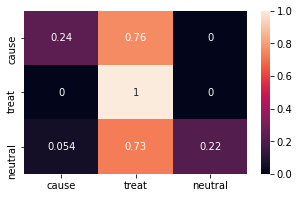

In [216]:
# model on sentence from paper
eval_model(multi_nb_model, X_test, y_test)

Model eval (separate for each label: ['cause' 'treat' 'neutral'])
precision: [0.83333333 0.50909091 1.        ]
recall: [0.17241379 1.         0.16216216]
f-score: [0.28571429 0.6746988  0.27906977]
number of occurences of each label: [29 56 37]

Model eval (micro)
precision: 0.5491803278688525
recall: 0.5491803278688525
f-score: 0.5491803278688525

Model eval (macro)
precision: 0.7808080808080807
recall: 0.44485865175520356
f-score: 0.41316094944562304



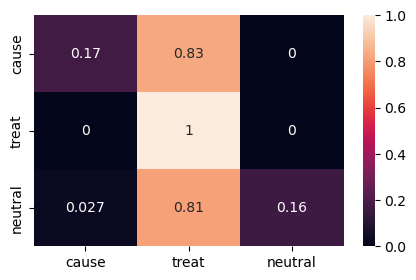

In [9]:
eval_model(multi_nb_model, X_test, y_test)

**The result is not good and not bad. The prediction largely depends on the class: the model clearly prefers "treat" label to other labels. It also performs worst for the "neutral" sentences, which don't describe neither treat nor cause of a disease.**

**Support Vector Machine Classifier performs much better, although the trend of favouring the "treat" class more and "neutral" being the worst predicted class remains.**

In [248]:
t, svm_classifier = train_svm_classifier(X_train, y_train, (1, 3))

In [17]:
y_train_neutral = y_train.replace({'treat': 'not-neutral', 'cause': 'not-neutral'})
y_test_neutral = y_test.replace({'treat': 'not-neutral', 'cause': 'not-neutral'})

In [46]:
from tuwnlpie.milestone1.model import TwoStepSVMClassifier

Model eval (separate for each label: ['cause' 'treat' 'neutral'])
precision: [0.71428571 0.74242424 0.78571429]
recall: [0.68965517 0.875      0.59459459]
f-score: [0.70175439 0.80327869 0.67692308]
number of occurences of each label: [29 56 37]

Model eval (micro)
precision: 0.7459016393442623
recall: 0.7459016393442623
f-score: 0.7459016393442623

Model eval (macro)
precision: 0.7474747474747474
recall: 0.7197499223361293
f-score: 0.7273187171375265



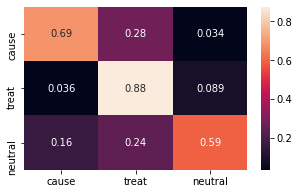

In [50]:
two_svm = TwoStepSVMClassifier(n_gram_range=(1,1))
two_svm.fit(X_train, y_train)
eval_model(two_svm, X_test, y_test, binary=False)

In [26]:
y_pred = svm_classifier.predict(t.transform(X_test))

In [42]:
import numpy as np
y_test.iloc[np.where(y_pred == 'not-neutral')[0]]

343      cause
218      cause
420      cause
299      treat
155      treat
        ...   
110    neutral
502      treat
46       cause
447    neutral
68       cause
Name: target, Length: 119, dtype: object

Model eval
precision: [0.70588235 0.55789474 0.9       ]
recall: [0.4137931  0.94642857 0.24324324]
f-score: [0.52173913 0.70198675 0.38297872]
number of occurences of each label (from ['cause' 'treat' 'neutral']): [29 56 37]



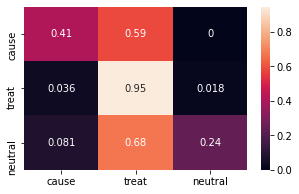

In [54]:
t, svm_classifier = train_svm_classifier(X_train, y_train, (1, 1))
eval_model(svm_classifier, t.transform(X_test), y_test, binary=True)

Model eval
precision: [0.71428571 0.70666667 0.89473684]
recall: [0.68965517 0.94642857 0.45945946]
f-score: [0.70175439 0.80916031 0.60714286]
number of occurences of each label (from ['cause' 'treat' 'neutral']): [29 56 37]



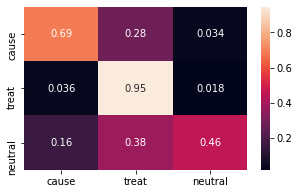

In [9]:
# model with trigrams on sentence from paper
t, svm_classifier = train_svm_classifier(X_train, y_train, (1, 2))
eval_model(svm_classifier, t.transform(X_test), y_test, binary=True)

Model eval (separate for each label: ['cause' 'treat' 'neutral'])
precision: [0.76923077 0.68292683 1.        ]
recall: [0.68965517 1.         0.37837838]
f-score: [0.72727273 0.8115942  0.54901961]
number of occurences of each label: [29 56 37]

Model eval (micro)
precision: 0.7377049180327869
recall: 0.7377049180327869
f-score: 0.7377049180327869

Model eval (macro)
precision: 0.817385866166354
recall: 0.6893445169307238
f-score: 0.6959621793381384



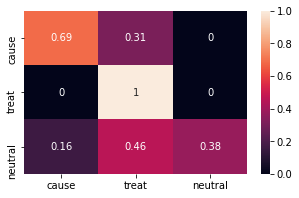

In [249]:
# model with bigrams on sentence from paper
eval_model(svm_classifier, t.transform(X_test), y_test)

Model eval (separate for each label: ['cause' 'treat' 'neutral'])
precision: [0.65384615 0.68493151 0.65217391]
recall: [0.5862069  0.89285714 0.40540541]
f-score: [0.61818182 0.7751938  0.5       ]
number of occurences of each label: [29 56 37]

Model eval (micro)
precision: 0.6721311475409836
recall: 0.6721311475409836
f-score: 0.6721311475409836

Model eval (macro)
precision: 0.663650524579649
recall: 0.6281564816047575
f-score: 0.6311252055438102



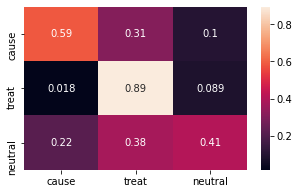

In [215]:
# model on sentence from paper
eval_model(svm_classifier, X_test, y_test)

Model eval (separate for each label: ['cause' 'treat' 'neutral'])
precision: [0.74074074 0.71830986 0.83333333]
recall: [0.68965517 0.91071429 0.54054054]
f-score: [0.71428571 0.80314961 0.6557377 ]
number of occurences of each label: [29 56 37]

Model eval (micro)
precision: 0.7459016393442623
recall: 0.7459016393442623
f-score: 0.7459016393442623

Model eval (macro)
precision: 0.7641279777430013
recall: 0.7136366662228731
f-score: 0.7243910085009867



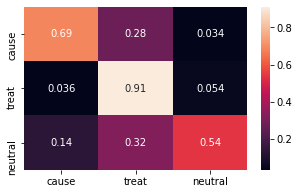

In [14]:
eval_model(svm_classifier, X_test, y_test)

## Using 2 classes (treat, cause)

**Becaus the neutral class confused the model and we are not sure if it is relevant for the classification task, we tried the classification only on two "opposite" classes. The results improved for both models.**

In [276]:
X_train, X_test, y_train, y_test = split_train_test_sklearn(fulldata_lemmatized[(fulldata_lemmatized.target == 'treat') | (fulldata_lemmatized.target == 'cause')])

In [13]:
multi_nb_model=train_multi_nb_classifier(X_train, y_train)

Model eval
precision: [0.85 1.  ]
recall: [1.   0.52]
f-score: [0.91891892 0.68421053]
number of occurences of each label (from ['treat' 'cause']): [68 25]



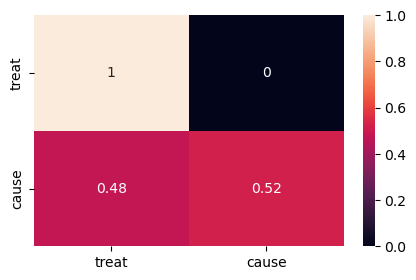

In [14]:
eval_model(multi_nb_model, X_test, y_test, binary=True)

In [259]:
svm_classifier = train_svm_classifier(X_train, y_train)

Model eval
precision: [0.91549296 0.86363636]
recall: [0.95588235 0.76      ]
f-score: [0.9352518  0.80851064]
number of occurences of each label (from ['treat' 'cause']): [68 25]



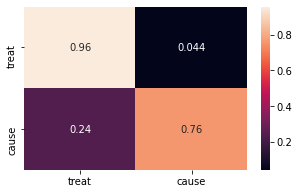

In [281]:
# model with bigrams on full sentence
t, svm_classifier = train_svm_classifier(X_train, y_train, (1,2))
eval_model(svm_classifier, t.transform(X_test), y_test, binary=True)

Model eval
precision: [0.90277778 0.85714286]
recall: [0.95588235 0.72      ]
f-score: [0.92857143 0.7826087 ]
number of occurences of each label (from ['treat' 'cause']): [68 25]



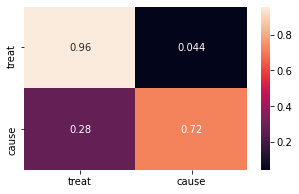

In [282]:
# model with bigrams on sentence 
t, svm_classifier = train_svm_classifier(X_train, y_train, (1,1))
eval_model(svm_classifier, t.transform(X_test), y_test, binary=True)

Model eval
precision: [0.92957746 0.90909091]
recall: [0.97058824 0.8       ]
f-score: [0.94964029 0.85106383]
number of occurences of each label (from ['treat' 'cause']): [68 25]



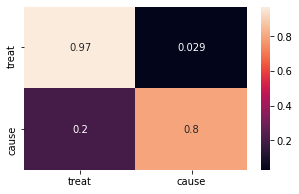

In [246]:
# model with trigrams on sentence from paper
t, svm_classifier = train_svm_classifier(X_train, y_train, (1, 3))
eval_model(svm_classifier, t.transform(X_test), y_test, binary=True)

Model eval
precision: [0.90140845 0.81818182]
recall: [0.94117647 0.72      ]
f-score: [0.92086331 0.76595745]
number of occurences of each label (from ['treat' 'cause']): [68 25]



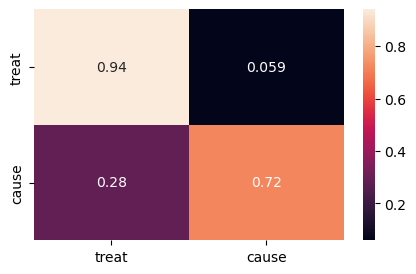

In [16]:
eval_model(svm_classifier, X_test, y_test, binary=True)

## Undersampling treat class

**The dataset is pretty imbalanced, "treat" has a much larger number of samples, so we tried to undersample it and see if it would improve predictions for other classes.**

**Undersampling the treat class because it's largely imbalanced**

In [17]:
undersampled_df=undersampling_dataset(fulldata_lemmatized)

In [18]:
X_train, X_test, y_train, y_test = split_train_test_sklearn(undersampled_df)

In [19]:
multi_nb_model=train_multi_nb_classifier(X_train, y_train)

**MultinomialNB works better on a "balanced" dataset, but the performance of SVM on imbalanced dataset is still better.**

Model eval (separate for each label: ['neutral' 'cause' 'treat'])
precision: [0.76470588 0.7037037  0.48837209]
recall: [0.43333333 0.55882353 0.91304348]
f-score: [0.55319149 0.62295082 0.63636364]
number of occurences of each label: [30 34 23]

Model eval (micro)
precision: 0.6091954022988506
recall: 0.6091954022988506
f-score: 0.6091954022988506

Model eval (macro)
precision: 0.6522605596933002
recall: 0.6350667803353226
f-score: 0.6041686484658232



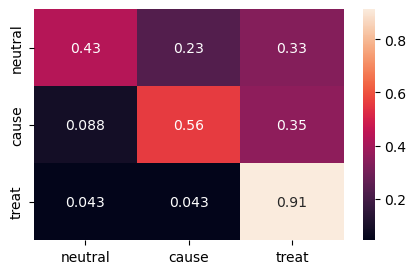

In [20]:
eval_model(multi_nb_model, X_test, y_test, binary=False)

**Undersampling only influences the SVM classifier negatively.**

In [21]:
svm_classifier = train_svm_classifier(X_train, y_train)

Model eval (separate for each label: ['neutral' 'cause' 'treat'])
precision: [0.77272727 0.74193548 0.58823529]
recall: [0.56666667 0.67647059 0.86956522]
f-score: [0.65384615 0.70769231 0.70175439]
number of occurences of each label: [30 34 23]

Model eval (micro)
precision: 0.6896551724137931
recall: 0.6896551724137931
f-score: 0.6896551724137931

Model eval (macro)
precision: 0.7009660169052959
recall: 0.7042341574310883
f-score: 0.6877642825011246



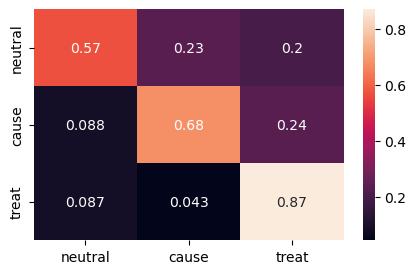

In [22]:
eval_model(svm_classifier, X_test, y_test)

# Overall Discussion for different approaches:
- When comparing the two Naive Bayes Models for the dataset with 3 target levels the first approach with NLTK package has slightly better results than the one using the MultinomialNB from sklearn package. The F-Score for all 3 levels is slightly better for the NLTK version. But it also has to be mentioned that both versions use very different data structures and the dictionary structure from NLTK has were slow computing time
- The SVM for the dataset with 3 target levels performed much better than both Naive bayes models. It provides good performance over all 3 target levels but still favors the most dominant class in the dataset, the "treat" label.
- We also tried two approaches to improve results: using a binary target class and using undersampling to reduce the bias in the prediction of labels
- When using a binary target the results improved for the treat class but for the "cause" class the improvements where only small. 
- Undersampling the treat class to counter the imbalanceness in the target variable showed different results when comparing Naive Bayes model to the SVM model. For the Naive Bayes model the performance improved but for the SVM model the performance dropped slightly and therefore is not recommendable to use for further approaches. 